In [27]:
# Logistic regression for binary classification - Spam classification

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline



In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
spam_data = pd.read_csv('spam.csv', usecols=['v1','v2'], encoding='latin-1')
spam_data.columns = ['label', 'message']


In [30]:
spam_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
# converting labels to a binary format

spam_data['label'] = spam_data['label'].map({'ham': 0, 'spam': 1})

In [32]:
spam_data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
# Feature matrix and target vector
X = spam_data['message']
y = spam_data['label']

In [34]:
# Split the dataset into training and testing sets

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), # Convert messages to TF-IDF features
    ('logreg', LogisticRegression()) # Apply Logistic regression
])

In [37]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('logreg', LogisticRegression())])

In [38]:
y_pred = pipeline.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1])

In [44]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.967713004484305
Precision: 0.9913793103448276
Recall: 0.7666666666666667
ROC AUC: 0.984


In [45]:
#  Confusion matrix output
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[964   1]
 [ 35 115]]


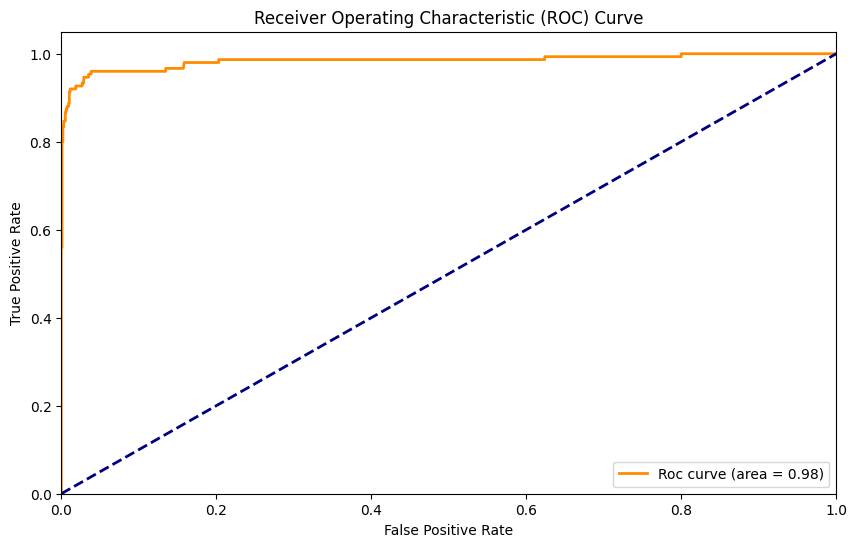

In [48]:
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt 
#Calculate the ROC curve points

fpr, tpr, thresholds = roc_curve(y_test,pipeline.predict_proba(X_test)[:,1])
# Calculating the AUC (area under the curve)
roc_auc = auc(fpr,tpr)

# Plot the ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='darkorange', lw=2,label='Roc curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [49]:
def is_spam(message):
    return pipeline.predict([message])[0]

print(is_spam('Congratulations! You have been selected as a winner. Text WON to 44255 to claim your prize.'))
print(is_spam('Hey, how are you?'))
print(is_spam('I am a prince from Nigeria and I need your help'))
print(is_spam('I am a student at Oxford University'))

1
0
0
0


In [50]:
# Text spammy messages

print(is_spam('Congratulations! You have been selected as a winner. Text WON to 44255 to claim your prize.'))
print(is_spam('You have won a free ticket to the Bahamas!'))
print(is_spam('You have been selected for a free prize!'))
print(is_spam('You have been selected for a free prize! Text WON to 44255 to claim your prize.'))
print(is_spam('You have been selected for a free prize! Text WON to 44255 to claim your prize. Text STOP to 44255 to stop receiving messages.'))

1
0
1
1
1


In [51]:
print(is_spam("You won 1000000 pounds. Click here to claim your prize"))

1
